In [11]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/supermarket-analysis-python/SuperMarket Analysis.csv


In [12]:
pip install pandas matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.


In [13]:
import pandas as pd

# Load the dataset
url = "/kaggle/input/supermarket-analysis-python/SuperMarket Analysis.csv"  # Replace with the actual path to your downloaded dataset
df = pd.read_csv(url)

# Show the first few rows of the dataset
print(df.head())


    Invoice ID Branch       City Customer type  Gender  \
0  750-67-8428   Alex     Yangon        Member  Female   
1  226-31-3081   Giza  Naypyitaw        Normal  Female   
2  631-41-3108   Alex     Yangon        Normal  Female   
3  123-19-1176   Alex     Yangon        Member  Female   
4  373-73-7910   Alex     Yangon        Member  Female   

             Product line  Unit price  Quantity   Tax 5%     Sales       Date  \
0       Health and beauty       74.69         7  26.1415  548.9715   1/5/2019   
1  Electronic accessories       15.28         5   3.8200   80.2200   3/8/2019   
2      Home and lifestyle       46.33         7  16.2155  340.5255   3/3/2019   
3       Health and beauty       58.22         8  23.2880  489.0480  1/27/2019   
4       Sports and travel       86.31         7  30.2085  634.3785   2/8/2019   

          Time      Payment    cogs  gross margin percentage  gross income  \
0   1:08:00 PM      Ewallet  522.83                 4.761905       26.1415   
1  10:29

In [14]:
# Check the data types and missing values
print(df.info())

# Check for missing values
print(df.isnull().sum())

# Display summary statistics for numeric columns
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Sales                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [15]:
# Drop rows with missing values (or you can choose to fill them with df.fillna())
df.dropna(inplace=True)

# Convert Date to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Convert Quantity and UnitPrice to numeric (if necessary)
df['Quantity'] = pd.to_numeric(df['Quantity'], errors='coerce')
df['Unit price'] = pd.to_numeric(df['Unit price'], errors='coerce')

# Ensure there are no more missing values
print(df.isnull().sum())


Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Sales                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64


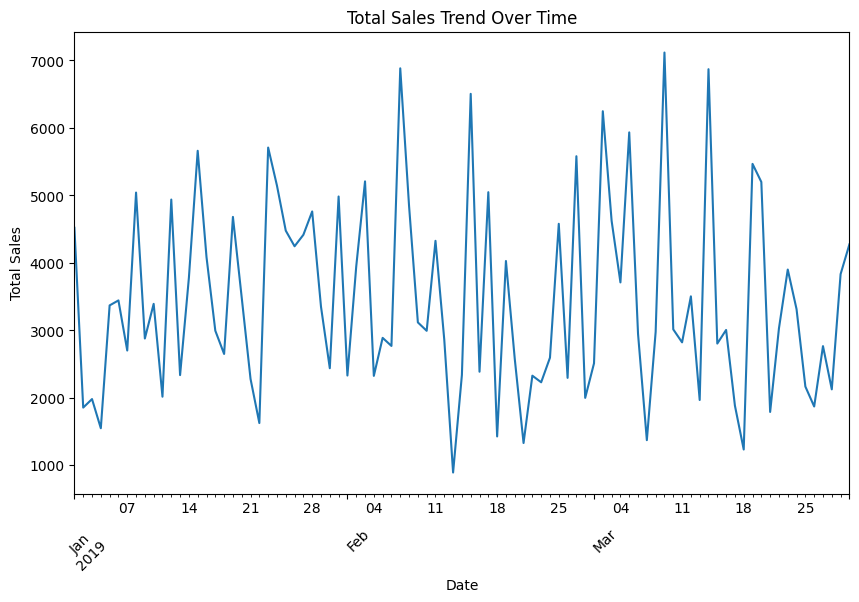

In [16]:
# Create a new column for total sales (Quantity * Unit Price)
df['Total Sales'] = df['Quantity'] * df['Unit price']

# Group data by Date and sum the sales for each day
sales_trend = df.groupby('Date')['Total Sales'].sum()

# Plot the sales trend over time
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sales_trend.plot()
plt.title('Total Sales Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()


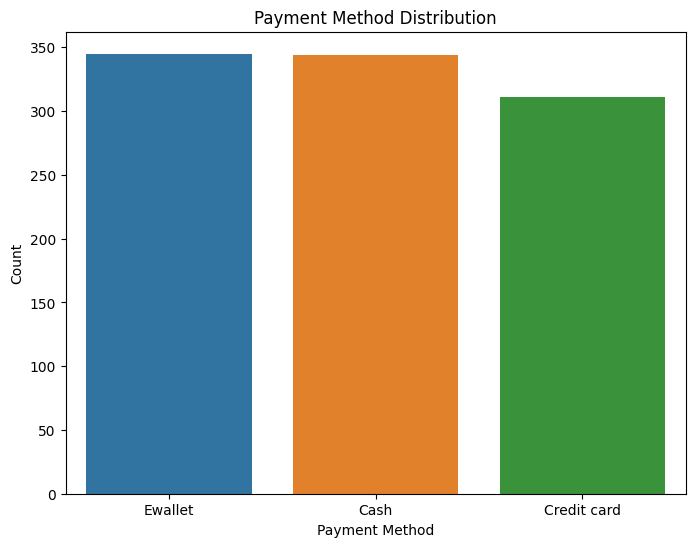

In [17]:
# Count the occurrences of each payment method
payment_methods = df['Payment'].value_counts()

# Plot the distribution of payment methods
import seaborn as sns

plt.figure(figsize=(8,6))
sns.barplot(x=payment_methods.index, y=payment_methods.values)
plt.title('Payment Method Distribution')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.show()


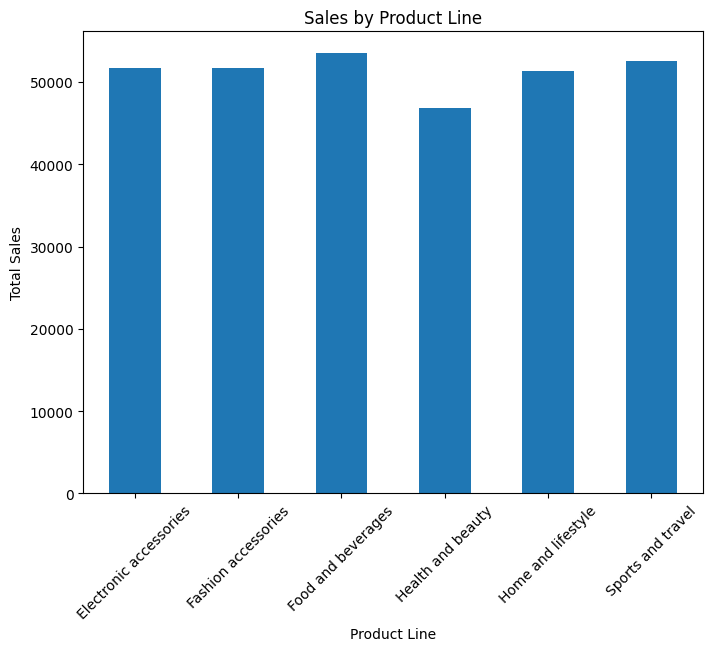

In [18]:
# Group sales by product line
product_line_sales = df.groupby('Product line')['Total Sales'].sum()

# Plot the sales by product line
plt.figure(figsize=(8,6))
product_line_sales.plot(kind='bar')
plt.title('Sales by Product Line')
plt.xlabel('Product Line')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()


In [25]:
# Calculate IQR for numerical columns (e.g., Quantity, Unit price, Total Sales)
Q1 = df[['Quantity', 'Unit price', 'Total Sales']].quantile(0.25)
Q3 = df[['Quantity', 'Unit price', 'Total Sales']].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for each column
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers
df_no_outliers = df[~((df[['Quantity', 'Unit price', 'Total Sales']] < lower_bound) | 
                      (df[['Quantity', 'Unit price', 'Total Sales']] > upper_bound)).any(axis=1)]

# Check the shape before and after removing outliers
print(f"Original dataset shape: {df.shape}")
print(f"Shape after removing outliers: {df_no_outliers.shape}")


Original dataset shape: (1000, 22)
Shape after removing outliers: (991, 22)


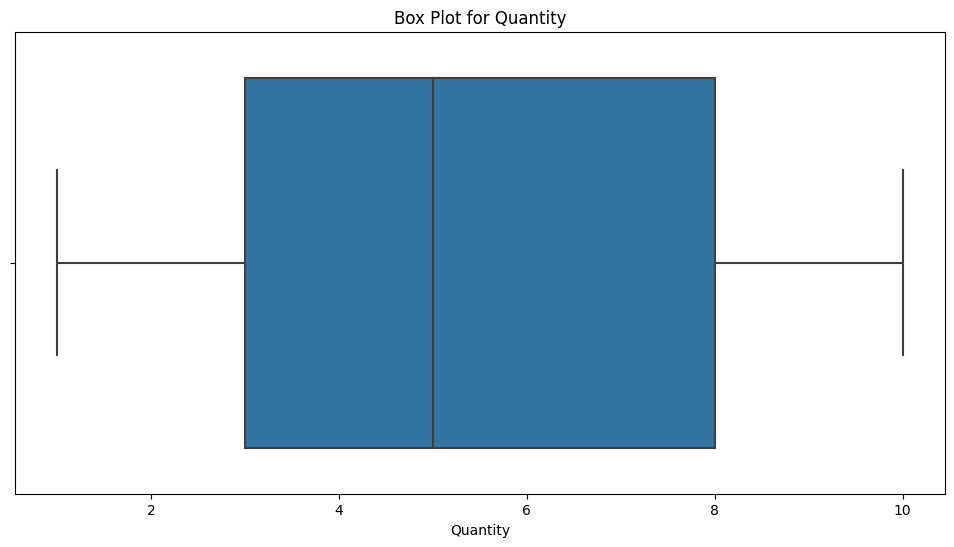

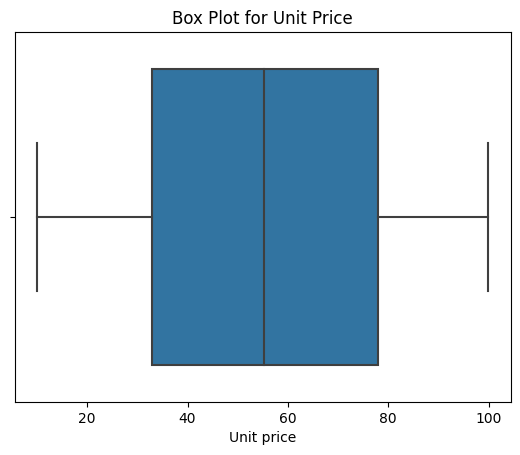

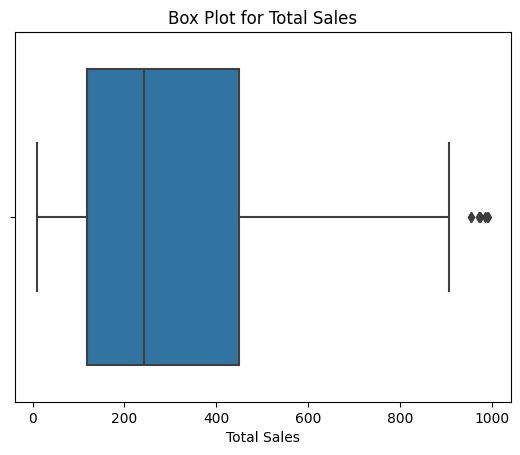

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot box plots for relevant columns (e.g., Quantity, Unit price, Total Sales)
plt.figure(figsize=(12, 6))

# Box plot for 'Quantity'
sns.boxplot(x=df['Quantity'])
plt.title('Box Plot for Quantity')
plt.show()

# Box plot for 'Unit price'
sns.boxplot(x=df['Unit price'])
plt.title('Box Plot for Unit Price')
plt.show()

# Box plot for 'Total Sales'
sns.boxplot(x=df['Total Sales'])
plt.title('Box Plot for Total Sales')
plt.show()


In [27]:
df['Quantity'] = df['Quantity'].clip(lower=0, upper=100)  # Example of capping


In [28]:
# Summary statistics of the numerical columns
print(df.describe())

# Summary of categorical variables
print(df.describe(include=['object']))


        Unit price     Quantity       Tax 5%        Sales  \
count  1000.000000  1000.000000  1000.000000  1000.000000   
mean     55.672130     5.510000    15.379369   322.966749   
min      10.080000     1.000000     0.508500    10.678500   
25%      32.875000     3.000000     5.924875   124.422375   
50%      55.230000     5.000000    12.088000   253.848000   
75%      77.935000     8.000000    22.445250   471.350250   
max      99.960000    10.000000    49.650000  1042.650000   
std      26.494628     2.923431    11.708825   245.885335   

                             Date        cogs  gross margin percentage  \
count                        1000  1000.00000             1.000000e+03   
mean   2019-02-14 00:05:45.600000   307.58738             4.761905e+00   
min           2019-01-01 00:00:00    10.17000             4.761905e+00   
25%           2019-01-24 00:00:00   118.49750             4.761905e+00   
50%           2019-02-13 00:00:00   241.76000             4.761905e+00   
75%   

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


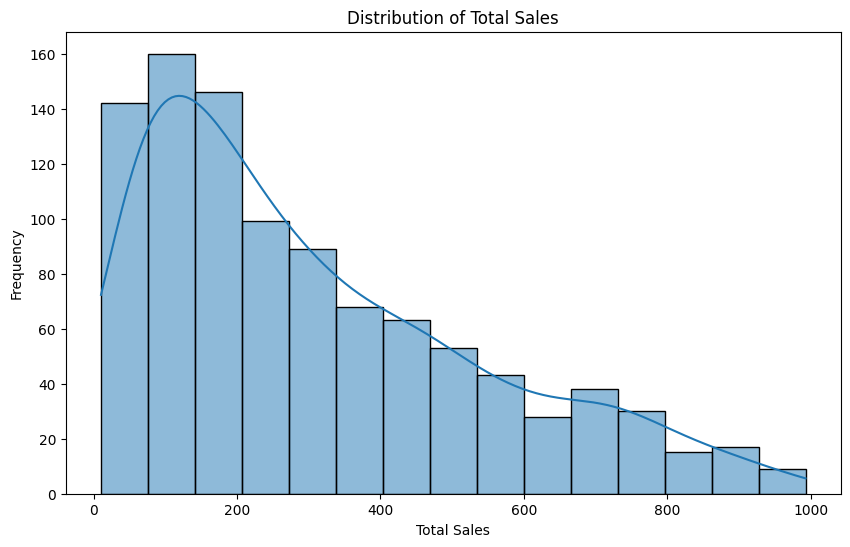

In [29]:
# Histogram for Total Sales
plt.figure(figsize=(10, 6))
sns.histplot(df['Total Sales'], kde=True)
plt.title('Distribution of Total Sales')
plt.xlabel('Total Sales')
plt.ylabel('Frequency')
plt.show()


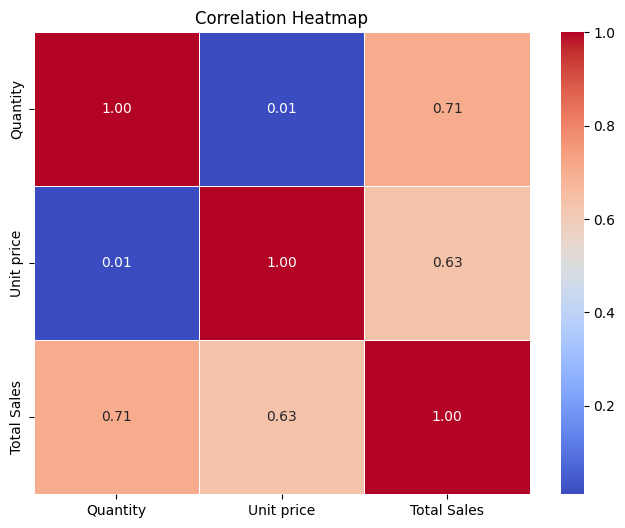

In [30]:
# Correlation matrix
corr_matrix = df[['Quantity', 'Unit price', 'Total Sales']].corr()

# Heatmap for correlation
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


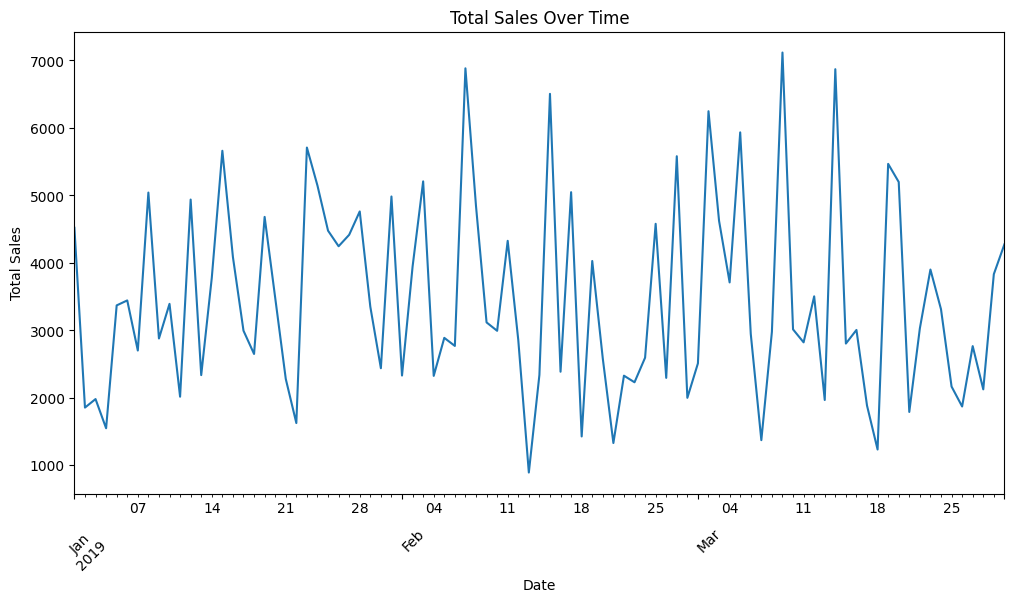

In [31]:
# Group by Date and sum Total Sales
sales_by_date = df.groupby('Date')['Total Sales'].sum()

# Plot total sales over time
plt.figure(figsize=(12, 6))
sales_by_date.plot()
plt.title('Total Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()


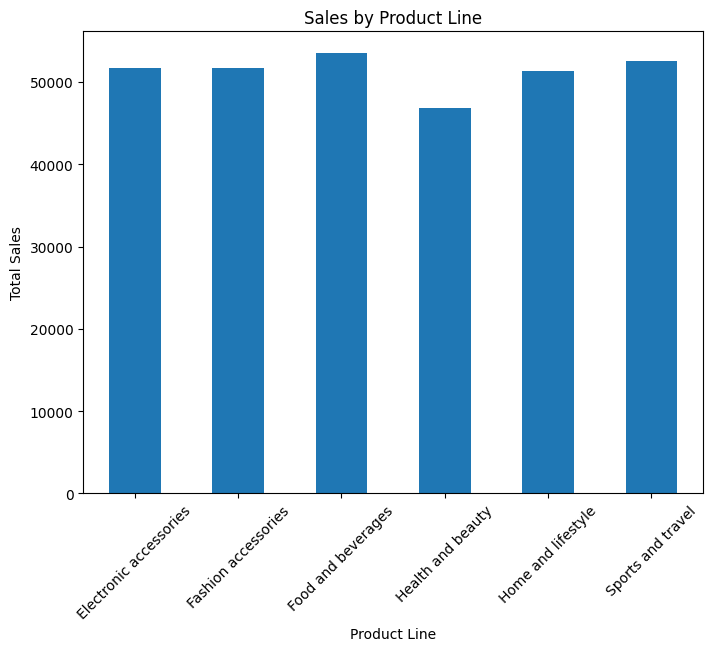

In [32]:
# Group by Product line and sum Total Sales
sales_by_product_line = df.groupby('Product line')['Total Sales'].sum()

# Plot sales by product line
plt.figure(figsize=(8, 6))
sales_by_product_line.plot(kind='bar')
plt.title('Sales by Product Line')
plt.xlabel('Product Line')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()


In [34]:
# Define the features (X) and target (y)
X = df[['Quantity', 'Unit price', 'Product line']]  # Features
y = df['Total Sales']  # Target variable


In [35]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [37]:
# Drop categorical columns (e.g., 'Product line', 'Payment', etc.)
df_cleaned = df.drop(columns=['Product line', 'Payment'])

# Now try your analysis or model with the cleaned dataset
X = df_cleaned[['Quantity', 'Unit price']]
y = df_cleaned['Total Sales']


In [40]:
# One-Hot Encoding for categorical columns like 'Product line' and 'Payment'
df_encoded = pd.get_dummies(df, columns=['Product line', 'Payment'], drop_first=True)

# Check the new column names
print(df_encoded.columns)


Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender', 'Unit price',
       'Quantity', 'Tax 5%', 'Sales', 'Date', 'Time', 'cogs',
       'gross margin percentage', 'gross income', 'Rating', 'Total Sales',
       'Year', 'Month', 'Day', 'Weekday', 'Product line_Fashion accessories',
       'Product line_Food and beverages', 'Product line_Health and beauty',
       'Product line_Home and lifestyle', 'Product line_Sports and travel',
       'Payment_Credit card', 'Payment_Ewallet'],
      dtype='object')


In [44]:
# Select the feature columns (numerical and one-hot encoded)
X = df_encoded[['Quantity', 'Unit price', 
                'Product line_Fashion accessories', 'Product line_Food and beverages', 
                'Product line_Health and beauty', 'Product line_Home and lifestyle',
                'Product line_Sports and travel', 
                'Payment_Credit card', 'Payment_Ewallet']]

# Target variable
y = df_encoded['Total Sales']


In [45]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shape of the resulting datasets
print(f"Training Features Shape: {X_train.shape}")
print(f"Testing Features Shape: {X_test.shape}")


Training Features Shape: (800, 9)
Testing Features Shape: (200, 9)


In [46]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-Squared: {r2}")


Mean Squared Error: 5716.416307128351
R-Squared: 0.9031287237045302


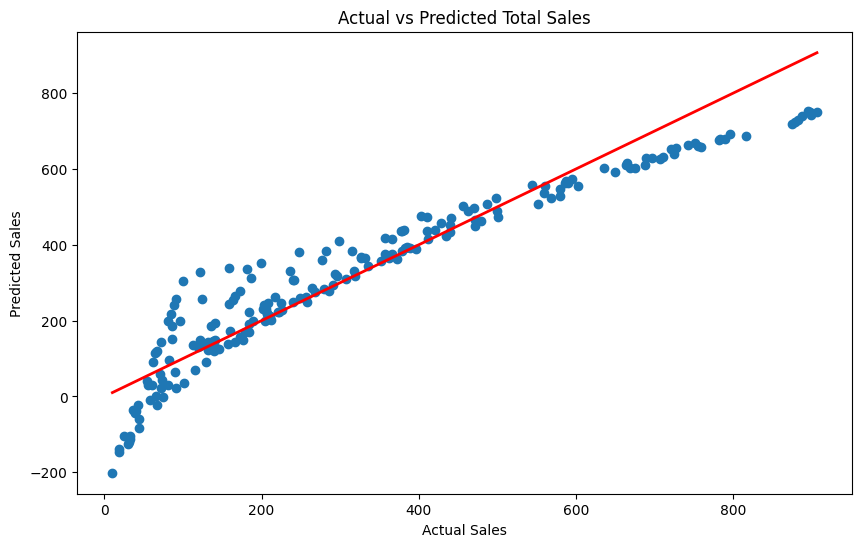

In [47]:
import matplotlib.pyplot as plt

# Plot actual vs predicted Total Sales
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)  # Ideal line
plt.title('Actual vs Predicted Total Sales')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.show()


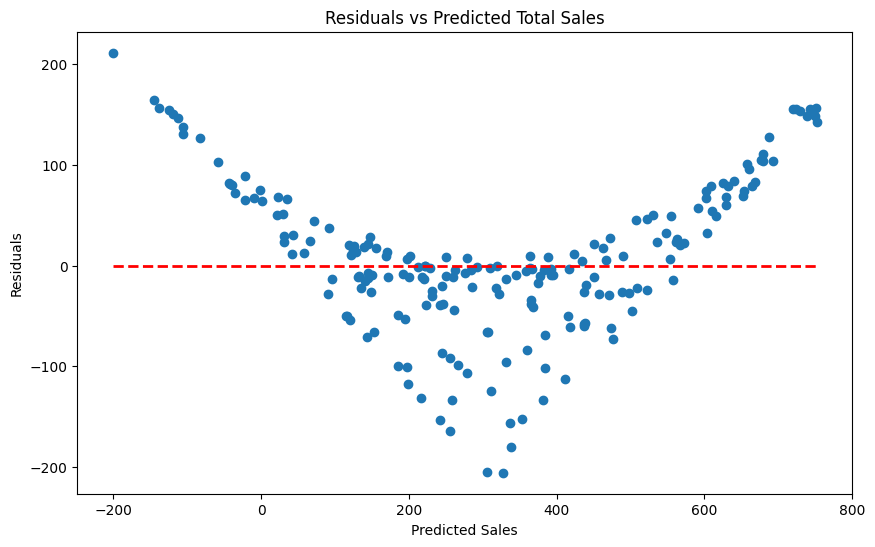

In [48]:
# Residuals plot
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals)
plt.hlines(y=0, xmin=y_pred.min(), xmax=y_pred.max(), colors='red', linestyles='dashed', lw=2)
plt.title('Residuals vs Predicted Total Sales')
plt.xlabel('Predicted Sales')
plt.ylabel('Residuals')
plt.show()


In [49]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Set up the model
rf_model = RandomForestRegressor()

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Best parameters
print(f"Best Parameters: {grid_search.best_params_}")

# Use the best estimator to make predictions
best_rf_model = grid_search.best_estimator_
y_pred_rf = best_rf_model.predict(X_test)

# Evaluate the new model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print(f"Mean Squared Error (Random Forest): {mse_rf}")
print(f"R-Squared (Random Forest): {r2_rf}")


Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Parameters: {'max_depth': 30, 'min_samples_split': 2, 'n_estimators': 100}
Mean Squared Error (Random Forest): 41.83463060045002
R-Squared (Random Forest): 0.9992910638690605


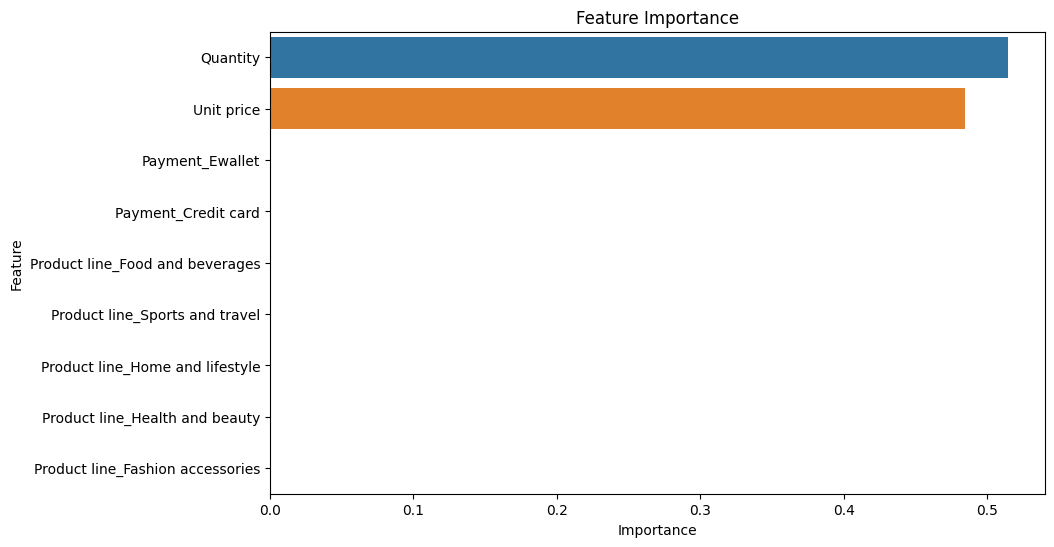

In [51]:
# using RandomForestRegressor  
feature_importances = best_rf_model.feature_importances_

# Create a DataFrame for easier interpretation
features_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=features_df)
plt.title('Feature Importance')
plt.show()


In [52]:
# Compare R-squared and MSE of both models
print(f"Linear Regression R-Squared: {r2}")
print(f"Random Forest R-Squared: {r2_rf}")

print(f"Linear Regression MSE: {mse}")
print(f"Random Forest MSE: {mse_rf}")



Linear Regression R-Squared: 0.9031287237045302
Random Forest R-Squared: 0.9992910638690605
Linear Regression MSE: 5716.416307128351
Random Forest MSE: 41.83463060045002


In [53]:
import joblib

# Save the best model (e.g., Random Forest)
joblib.dump(best_rf_model, 'supermarket_sales_model.pkl')


['supermarket_sales_model.pkl']

In [54]:
import joblib

# Load the saved model
model = joblib.load('supermarket_sales_model.pkl')


In [55]:
# Make predictions using the trained model
y_pred = model.predict(X_test)

# Print the first few predicted values
print(y_pred[:5])


[502.6756 555.6401 388.6498 132.5736  42.4161]


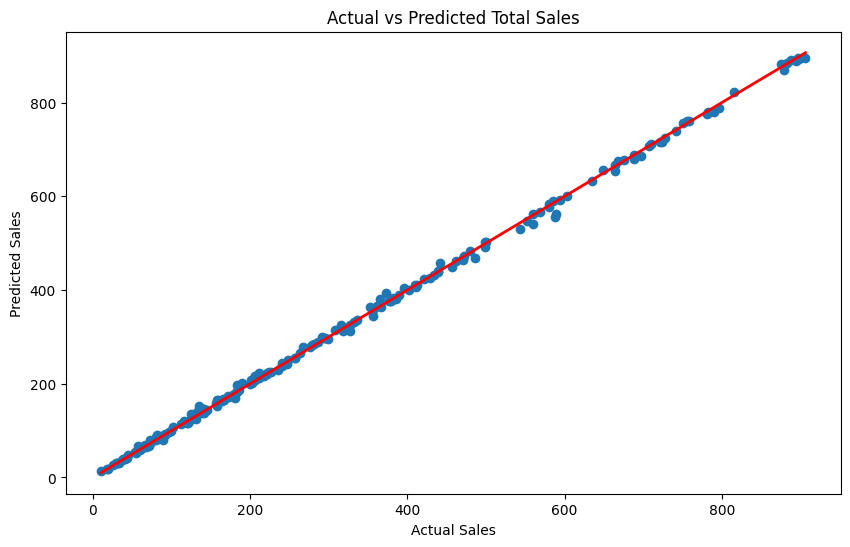

In [56]:
# Compare actual vs predicted values
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Plot actual vs predicted Total Sales
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)  # Ideal line
plt.title('Actual vs Predicted Total Sales')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.show()


In [57]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Calculate R-squared (coefficient of determination)
r2 = r2_score(y_test, y_pred)
print(f"R-Squared: {r2}")


Mean Squared Error: 41.83463060045002
R-Squared: 0.9992910638690605
